In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [51]:
def normalize(data):
  xmin = min(data[:,0])
  xmax = max(data[:,0])
  ymin = min(data[:,1])
  ymax = max(data[:,1])

  data[:,0] = [(x-xmin)/(xmax-xmin) for x in data[:,0]]
  data[:,1] = [(y-ymin)/(ymax-ymin) for y in data[:,1]]
  
  return data

In [52]:
data = np.genfromtxt('Dataset.csv', delimiter=',')
data = normalize(data)

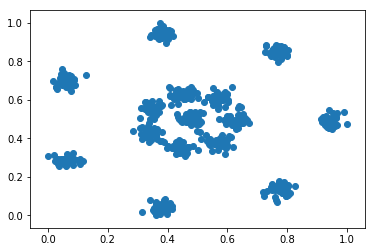

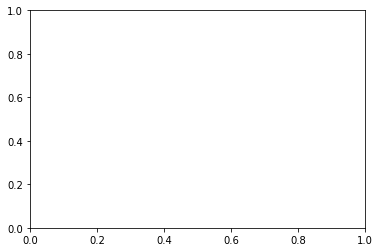

In [53]:
plt.scatter(x=data[:,0], y=data[:,1])
plt.ion
fig, ax = plt.subplots()

In [54]:
# Initialization

# Create random nxn matrices for output layer
# Each cell have 2 random value [0,1]

output_layer = np.random.random_sample(size=(10,10,2))

# Set learning rate
learning_rate = new_learning_rate = 0.1

# Set width variance
width = 2

# Set epoch
epoch = 500

# Set time constant
time = epoch / math.log(width)

In [55]:
# Calculate euclidean distance
def euclidean(x, y):
    return ((x[0]-y[0])**2) + ((x[1]-y[1])**2)

# Neighborhood Function to calculate how close is two node
def neighborhood(dist, width):
    return math.exp(-dist**2 / (2 * (width ** 2)))

# Update neighborhood
def update_neighborhood(width, iteration, time):
    neighborhood = width * math.exp(-iteration / time)

# Update learning rate
def update_learning_rate(iteration, epoch):
    return learning_rate * math.exp(float(-iteration) / epoch)

def find_bmu(x):
    # Find Best Matching Unit(BMU) of each input
    bmu = []
    min_dist = 999999

    for i in range(len(output_layer)):
        for j in range(len(output_layer)):
            curr_dist = euclidean(x, output_layer[i][j])
            if(curr_dist < min_dist):
                min_dist = curr_dist
                bmu = output_layer[i][j]

    return bmu

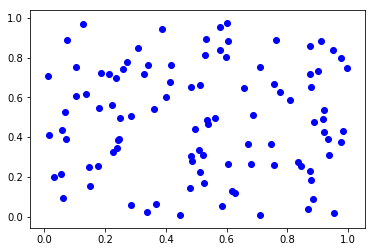

In [56]:
plt.scatter(x=output_layer[:,:,0], y=output_layer[:,:,1], color='blue')

#1
lr: 0.1


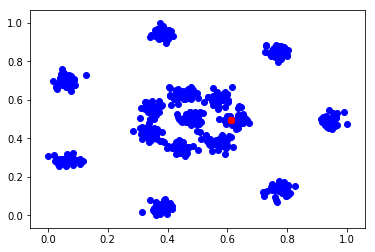

NameError: name 'time_w' is not defined

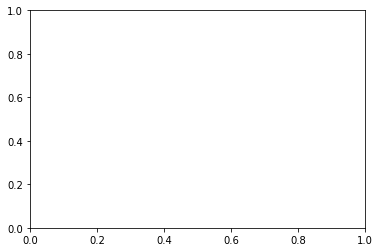

In [57]:
indices = np.arange(len(data))

plt.draw()
for i in range(1, epoch+1):
    print("#{}".format(i))
    print("lr: {}".format(new_learning_rate))
    np.random.shuffle(indices)

    # Iterasi seluruh isi dari dataset
    for idx in indices:
        x = data[idx]
        
        # Cari node pada output layer yang paling 'dekat' dengan x

        bmu = find_bmu(x)

        # Update bobot seluruh node yang 'dekat' dengan BMU
        for row in range(len(output_layer)):
            for col in range(len(output_layer)):
                curr_node = output_layer[row][col]
                curr_dist = euclidean(bmu, curr_node)

                # Apabila node ini berdekatan dengan BMU
                if(curr_dist <= width**2):
                    output_layer[row][col] = curr_node + (new_learning_rate * neighborhood(curr_dist, width) * (x - curr_node))
                     

    plt.scatter(x=data[:,0], y=data[:,1], color='blue')
    plt.scatter(x=output_layer[:,:,0], y=output_layer[:,:,1], color='red')
    fig.canvas.draw_idle()
    
    plt.pause(0.01)
    plt.cla()
    # Update Hyperparameter          
    width = update_neighborhood(width, i, time)
    new_learning_rate = update_learning_rate(i, epoch)

In [ ]:
plt.scatter(x=data[:,0], y=data[:,1], color='blue')
plt.scatter(x=output_layer[:,:,0], y=output_layer[:,:,1], color='red')
plt.show()